In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

import yt_misc_py as yt_misc


import rivas_decomposition_py as decomposition


dictConfig(dict(
    version = 1,
    formatters = {
        'f': {'format':
              '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}
        },
    handlers = {
        'h': {'class': 'logging.StreamHandler',
              'formatter': 'f',
              'level': logging.DEBUG}
        },
    root = {
        'handlers': ['h'],
        'level': logging.DEBUG,
        },
))


font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 16
}

matplotlib.rc('font', **font)


In [2]:
logger = getLogger('notebook')

In [6]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [7]:
d_PTVs = decomposition.decomposition(os.path.join(
    '..', '..', '..', 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_coding = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_all = decomposition.decomposition(os.path.join(
    '..', '..', '..', 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2019-01-25 15:12:45,314 data_load_from_npz INFO     reading data from ../../../private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz
2019-01-25 15:12:45,416 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz
2019-01-25 15:12:46,157 data_load_from_npz INFO     reading data from ../../../private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [8]:
phe_labels = [
    'Body mass index (BMI)',
    'heart attack/myocardial infarction', 
    'cholelithiasis/gall stones',     
]


### Phenotype squared cosine score for BMI (PTVs)

In [6]:
topk = 5

In [7]:
pcs_0based, ys = d_PTVs.get_topk_pcs_for_phe_with_scores_by_label(label=phe_labels[0], topk = topk)

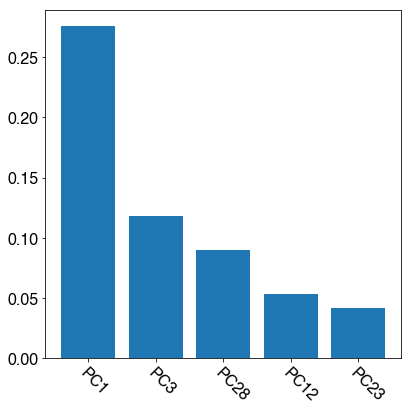

In [8]:
yt_misc.plot_bar({
    'x': np.arange(1, 1 + topk),
    'y': ys,
    'xticklabels': ['PC{}'.format(x + 1) for x in pcs_0based]
})

### (not used) scatter plot version

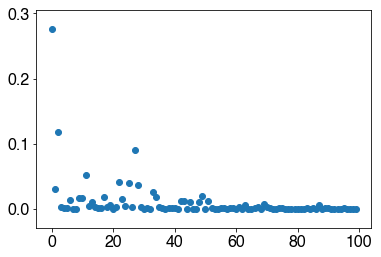

In [9]:
plt.scatter(np.arange(100), d_PTVs.get_cos_phe_by_label(phe_labels[0]))

In [11]:
phe_labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


### Squared cosine score for All dataset

In [14]:
dataset = d_all
topk = 5
dataset_name = 'All variants'

2018-10-03 02:09:10,946 notebook     DEBUG    0 0: [ 1  0 29 25 59]
2018-10-03 02:09:10,961 notebook     DEBUG    0 1: [21 99 82 85 92]
2018-10-03 02:09:10,984 notebook     DEBUG    0 2: [71 63 66 73 67]


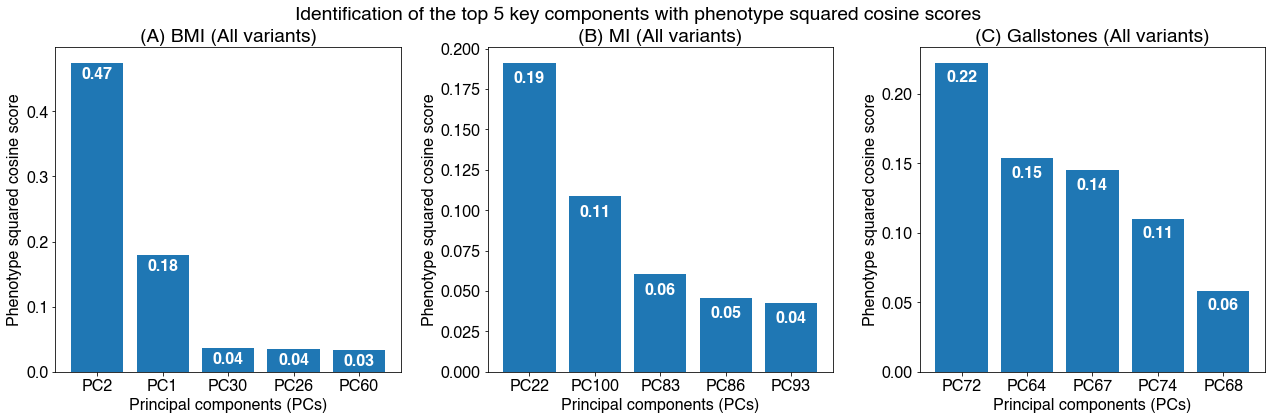

In [20]:
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, len(phe_labels))
fig_axs = [fig.add_subplot(sp) for sp in gs]

i_d = 0
d = dataset
for i_p, p in enumerate(phe_labels):
    pcs_0based, ys = d.get_topk_pcs_for_phe_with_scores_by_label(label=p, topk=topk)        
    ax_idx = i_d * 3 + i_p
    ax = fig_axs[ax_idx]
    ax.bar(
        np.arange(topk),
        ys,
    )
    logger.debug('{} {}: {}'.format(i_d, i_p, pcs_0based))
    ax.xaxis.set_ticks(np.arange(topk))        
    ax.set_xticklabels(
        ['PC{}'.format(x + 1) for x in pcs_0based],            
#            rotation=270+45, rotation_mode="anchor", ha='left',
#            minor=False
    ) 
    for i_y, y_val in enumerate(ys):
        if(y_val > 0.03):
            ax.text(
                i_y, y_val - 0.005, '{:.2f}'.format(y_val), 
                color='white', 
                fontweight='bold',
                verticalalignment = 'top',
                horizontalalignment='center',
            )
        else:
            ax.text(
                i_y, y_val + 0.005, '{:.2f}'.format(y_val), 
#                     color='white', 
#                     fontweight='bold',
                verticalalignment = 'baseline',
                horizontalalignment='center',
            )

    ax.set_xlabel('Principal components (PCs)')
    ax.set_ylabel('Phenotype squared cosine score')
    ax.set_title('({}) {} ({})'.format(
        chr(ord('A') + ax_idx), phe_labels_dict[p], dataset_name
    ))

fig.suptitle('Identification of the top 5 key components with phenotype squared cosine scores')
gs.tight_layout(fig, rect=[0, 0, 1, .97]) 



for ext in ['pdf', 'png']:
    fig.savefig(
        os.path.join(fig_out_dir, 'figS2_all.{}'.format(ext)),
        bbox_inches="tight", pad_inches=0.0,
    )



In [9]:
dataset = d_coding
topk = 5
dataset_name = 'Coding'

2019-01-25 15:14:23,350 notebook     DEBUG    0 0: [ 1  0 42  6 31]
2019-01-25 15:14:23,371 notebook     DEBUG    0 1: [60 14 58 56 88]
2019-01-25 15:14:23,398 notebook     DEBUG    0 2: [28 27 26 15 14]


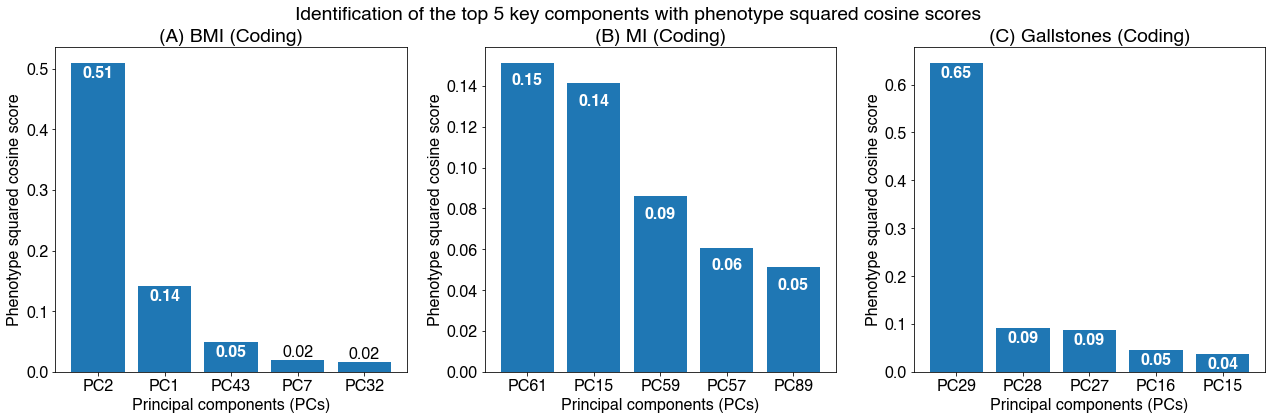

In [12]:
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, len(phe_labels))
fig_axs = [fig.add_subplot(sp) for sp in gs]

i_d = 0
d = dataset
for i_p, p in enumerate(phe_labels):
    pcs_0based, ys = d.get_topk_pcs_for_phe_with_scores_by_label(label=p, topk=topk)        
    ax_idx = i_d * 3 + i_p
    ax = fig_axs[ax_idx]
    ax.bar(
        np.arange(topk),
        ys,
    )
    logger.debug('{} {}: {}'.format(i_d, i_p, pcs_0based))
    ax.xaxis.set_ticks(np.arange(topk))        
    ax.set_xticklabels(
        ['PC{}'.format(x + 1) for x in pcs_0based],            
#            rotation=270+45, rotation_mode="anchor", ha='left',
#            minor=False
    ) 
    for i_y, y_val in enumerate(ys):
        if(y_val > 0.03):
            ax.text(
                i_y, y_val - 0.005, '{:.2f}'.format(y_val), 
                color='white', 
                fontweight='bold',
                verticalalignment = 'top',
                horizontalalignment='center',
            )
        else:
            ax.text(
                i_y, y_val + 0.005, '{:.2f}'.format(y_val), 
#                     color='white', 
#                     fontweight='bold',
                verticalalignment = 'baseline',
                horizontalalignment='center',
            )

    ax.set_xlabel('Principal components (PCs)')
    ax.set_ylabel('Phenotype squared cosine score')
    ax.set_title('({}) {} ({})'.format(
        chr(ord('A') + ax_idx), phe_labels_dict[p], dataset_name
    ))

fig.suptitle('Identification of the top 5 key components with phenotype squared cosine scores')
gs.tight_layout(fig, rect=[0, 0, 1, .97]) 



for ext in ['pdf', 'png']:
    fig.savefig(
        os.path.join(fig_out_dir, 'Sq_cos_coding.{}'.format(ext)),
        bbox_inches="tight", pad_inches=0.0,
    )



2018-10-03 02:14:17,051 notebook     DEBUG    0 0: [ 1  0 29 25 59]


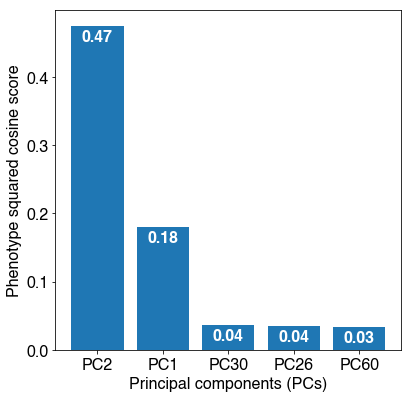

In [26]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]

i_d = 0
d = dataset
i_p = 0
p = phe_labels[0]
pcs_0based, ys = d.get_topk_pcs_for_phe_with_scores_by_label(label=p, topk=topk)        
ax_idx = i_d * 3 + i_p
ax = fig_axs[ax_idx]
ax.bar(
    np.arange(topk),
    ys,
)
logger.debug('{} {}: {}'.format(i_d, i_p, pcs_0based))
ax.xaxis.set_ticks(np.arange(topk))        
ax.set_xticklabels(
    ['PC{}'.format(x + 1) for x in pcs_0based],            
#            rotation=270+45, rotation_mode="anchor", ha='left',
#            minor=False
) 
for i_y, y_val in enumerate(ys):
    if(y_val > 0.03):
        ax.text(
            i_y, y_val - 0.005, '{:.2f}'.format(y_val), 
            color='white', 
            fontweight='bold',
            verticalalignment = 'top',
            horizontalalignment='center',
        )
    else:
        ax.text(
            i_y, y_val + 0.005, '{:.2f}'.format(y_val), 
#                     color='white', 
#                     fontweight='bold',
            verticalalignment = 'baseline',
            horizontalalignment='center',
        )

ax.set_xlabel('Principal components (PCs)')
ax.set_ylabel('Phenotype squared cosine score')
# ax.set_title('({}) {} ({})'.format(
#     chr(ord('A') + ax_idx), phe_labels_dict[p], dataset_name
# ))

# fig.suptitle('Identification of the top 5 key components with phenotype squared cosine scores')
gs.tight_layout(fig, rect=[0, 0, 1, .97]) 


for ext in ['pdf', 'png']:
    fig.savefig(
        os.path.join(fig_out_dir, 'figS2_PTVs.{}'.format(ext)),
        bbox_inches="tight", pad_inches=0.0,
    )



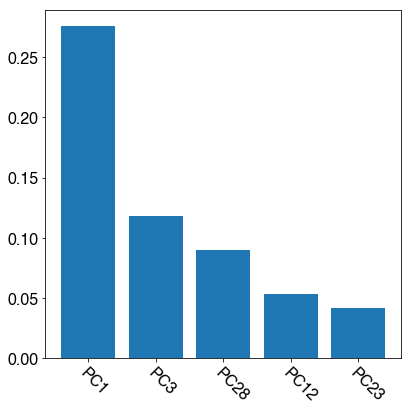

In [22]:
yt_misc.plot_bar({
    'x': np.arange(1, 1 + topk),
    'y': ys,
    'xticklabels': ['PC{}'.format(x + 1) for x in pcs_0based]
})

In [10]:
datasets = [d_all, d_PTVs]

In [49]:
dataset_names = [
    'All variants', 'Coding variants', 'PTVs'
]

2018-03-22 13:55:30,885 notebook     DEBUG    0 0: [ 1  0 29 25 59]
2018-03-22 13:55:30,903 notebook     DEBUG    0 1: [21 99 82 85 92]
2018-03-22 13:55:30,927 notebook     DEBUG    0 2: [71 63 66 73 67]
2018-03-22 13:55:30,946 notebook     DEBUG    1 0: [ 1  0 42  6 31]
2018-03-22 13:55:30,970 notebook     DEBUG    1 1: [60 14 58 56 88]
2018-03-22 13:55:30,999 notebook     DEBUG    1 2: [28 27 26 15 14]
2018-03-22 13:55:31,026 notebook     DEBUG    2 0: [ 0  2 27 11 22]
2018-03-22 13:55:31,058 notebook     DEBUG    2 1: [17 15 92  0 58]
2018-03-22 13:55:31,083 notebook     DEBUG    2 2: [48 52 45 89 49]


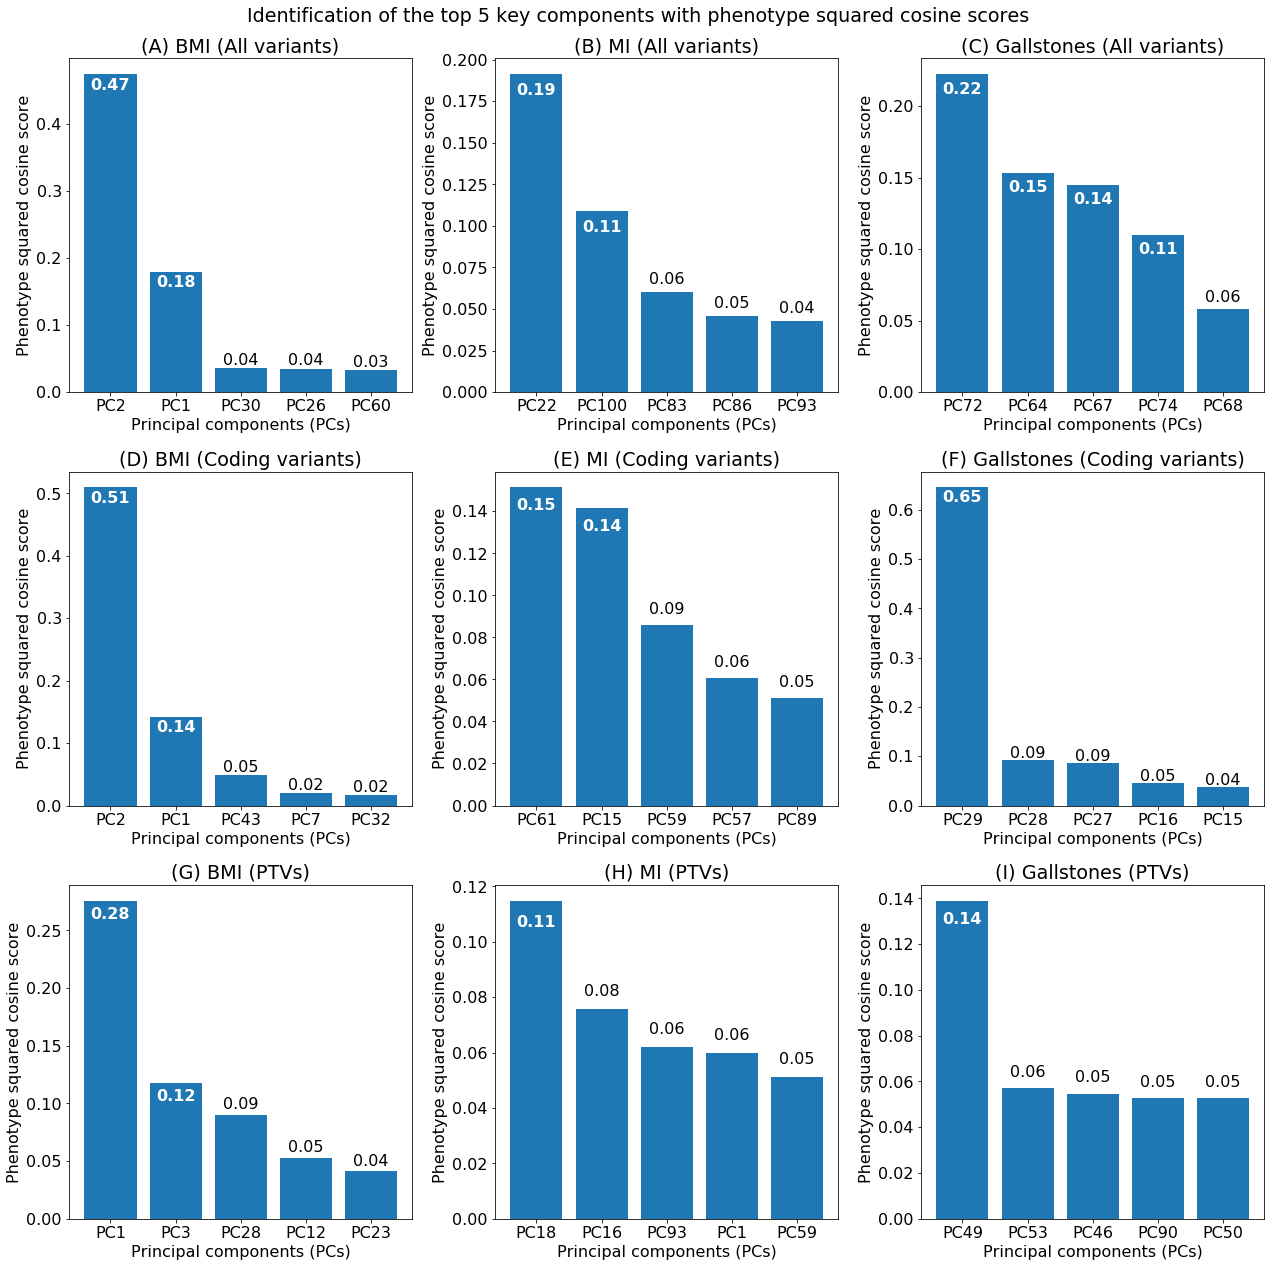

In [81]:
fig = plt.figure(figsize=(6, 18))
gs = gridspec.GridSpec(len(datasets), len(phe_labels))
fig_axs = [fig.add_subplot(sp) for sp in gs]

for i_d, d in enumerate(datasets):
    for i_p, p in enumerate(phe_labels):
        pcs_0based, ys = d.get_topk_pcs_for_phe_with_scores_by_label(label=p, topk=topk)        
        ax_idx = i_d * 3 + i_p
        ax = fig_axs[ax_idx]
        ax.bar(
            np.arange(topk),
            ys,
        )
        logger.debug('{} {}: {}'.format(i_d, i_p, pcs_0based))
        ax.xaxis.set_ticks(np.arange(topk))        
        ax.set_xticklabels(
            ['PC{}'.format(x + 1) for x in pcs_0based],            
#            rotation=270+45, rotation_mode="anchor", ha='left',
#            minor=False
        ) 
        for i_y, y_val in enumerate(ys):
            if(y_val > 0.10):
                ax.text(
                    i_y, y_val - 0.005, '{:.2f}'.format(y_val), 
                    color='white', 
                    fontweight='bold',
                    verticalalignment = 'top',
                    horizontalalignment='center',
                )
            else:
                ax.text(
                    i_y, y_val + 0.005, '{:.2f}'.format(y_val), 
#                     color='white', 
#                     fontweight='bold',
                    verticalalignment = 'baseline',
                    horizontalalignment='center',
                )
                
        ax.set_xlabel('Principal components (PCs)')
        ax.set_ylabel('Phenotype squared cosine score')
        ax.set_title('({}) {} ({})'.format(
            chr(ord('A') + ax_idx), phe_labels_dict[p], dataset_names[i_d]
        ))

fig.suptitle('Identification of the top 5 key components with phenotype squared cosine scores')
gs.tight_layout(fig, rect=[0, 0, 1, .97]) 



for ext in ['pdf', 'png']:
    fig.savefig(
        os.path.join(fig_out_dir, 'figS2.{}'.format(ext)),
        bbox_inches="tight", pad_inches=0.0,
    )

